In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

In [5]:
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size =len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

In [9]:
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data +b

print(W)
print(b)

Tensor("Variable_2/read:0", shape=(1,), dtype=float32)
Tensor("Variable_3/read:0", shape=(1,), dtype=float32)


In [11]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
print(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
loss: Tensor("Mean_1:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x10d437d30>
train: name: "GradientDescent_1"
op: "NoOp"
input: "^GradientDescent_1/update_Variable_2/ApplyGradientDescent"
input: "^GradientDescent_1/update_Variable_3/ApplyGradientDescent"

name: "init_1"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"
input: "^Variable_2/Assign"
input: "^Variable_3/Assign"



In [12]:
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

In [16]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
       print(step, sess.run([W, b]))

print(sess.run([W,b]))

0 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
20 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
40 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
60 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
80 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
100 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
120 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
140 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
160 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
180 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
200 [array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]
[array([ 0.09777226], dtype=float32), array([ 0.29973125], dtype=float32)]


(0, 1.0)

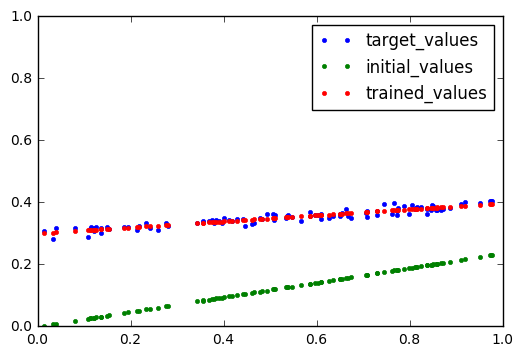

In [17]:
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, sess.run(y), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.0)